<a href="https://colab.research.google.com/github/santhoshsrivi/study/blob/main/customer_analytics_rftm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/content/online_retail_II.csv')

In [4]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
35191,492340,85014B,RED/WHITE DOTS RUFFLED UMBRELLA,1.0,2009-12-16 12:29:00,5.95,17954.0,United Kingdom
35192,492340,85014A,BLACK/BLUE DOTS RUFFLED UMBRELLA,1.0,2009-12-16 12:29:00,5.95,17954.0,United Kingdom
35193,492340,85014D,PINK/BROWN DOTS RUFFLED UMBRELLA,1.0,2009-12-16 12:29:00,5.95,17954.0,United Kingdom
35194,492340,20668,DISCO BALL CHRISTMAS DECORATION,17.0,2009-12-16 12:29:00,0.12,17954.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35196 entries, 0 to 35195
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      35196 non-null  object 
 1   StockCode    35195 non-null  object 
 2   Description  35121 non-null  object 
 3   Quantity     35195 non-null  float64
 4   InvoiceDate  35195 non-null  object 
 5   Price        35195 non-null  float64
 6   Customer ID  26007 non-null  float64
 7   Country      35195 non-null  object 
dtypes: float64(3), object(5)
memory usage: 2.1+ MB


**Finding the shape of the dataset**

In [6]:
df.shape

(35196, 8)

**Total number of object types**

In [7]:
print(df.dtypes.value_counts())

object     5
float64    3
dtype: int64


**Number of null values in each column**

In [8]:
df.isnull().sum().sort_values(ascending=False)

Customer ID    9189
Description      75
StockCode         1
Quantity          1
InvoiceDate       1
Price             1
Country           1
Invoice           0
dtype: int64

**Total duplicate values**

In [9]:
df.duplicated().sum()

386

**Statistics of data**

In [10]:
df.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,35196,35195,35121,35195.000000,35195,35195.00000,26007.000000,35195
unique,1697,2931,2908,NaN,1503,NaN,NaN,23
top,490074,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2009-12-03 14:39:00,NaN,NaN,United Kingdom
freq,580,261,260,NaN,580,NaN,NaN,33559
mean,NaN,NaN,NaN,9.322375,NaN,4.22074,15475.097128,NaN
std,NaN,NaN,NaN,63.155251,NaN,21.52357,1651.371122,NaN
min,NaN,NaN,NaN,-1395.000000,NaN,0.00000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.25000,14087.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.57000,15527.000000,NaN
75%,NaN,NaN,NaN,8.000000,NaN,4.95000,16918.000000,NaN


**Data info**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35196 entries, 0 to 35195
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      35196 non-null  object 
 1   StockCode    35195 non-null  object 
 2   Description  35121 non-null  object 
 3   Quantity     35195 non-null  float64
 4   InvoiceDate  35195 non-null  object 
 5   Price        35195 non-null  float64
 6   Customer ID  26007 non-null  float64
 7   Country      35195 non-null  object 
dtypes: float64(3), object(5)
memory usage: 2.1+ MB


> **Obseration**
* The Dataset has Rows: 1067371 and Columns:8
* The Dataset has 3 types of columns: strings(5), integer(1), float(2)
* The Dataset has Missing values in Customer ID (243007) and Description (4382)
* Invoice starts with the 'c' needs to be cleaned as it is cancelled transaction
* The Dataset has duplicates


**Dropping missing values**

In [12]:
df.dropna(subset='Customer ID',axis=0,inplace=True)
df.shape

(26007, 8)

In [13]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

**Removing cancelled products from dataframe**

In [14]:
df = df[~df['Invoice'].str.contains('C',na=False)]

**Removing Duplicates**

In [15]:
df = df.drop_duplicates(keep="first")
df.duplicated().sum()

0

**Check for negative values**

In [16]:
(df.Quantity<0).sum()
(df.Price<0).sum()

0

**Boxplot to see outliers in Quantity and price**

{'whiskers': [<matplotlib.lines.Line2D at 0x7995abf3fb20>,
 'caps': [<matplotlib.lines.Line2D at 0x7995abd840a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7995abf3f9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7995abd845e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7995abd84880>],
 'means': []}

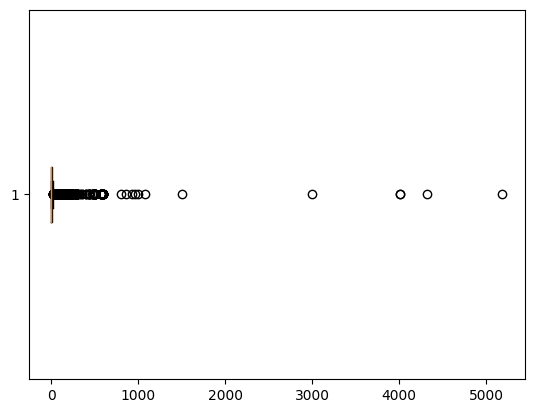

In [17]:
plt.boxplot(df['Quantity'],vert=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7995abe4ef20>,
 'caps': [<matplotlib.lines.Line2D at 0x7995abe4f460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7995abe4eda0>],
 'medians': [<matplotlib.lines.Line2D at 0x7995abe4f9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7995abe4fc40>],
 'means': []}

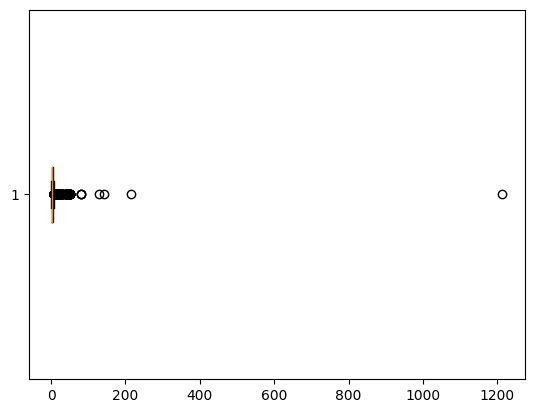

In [18]:
plt.boxplot(df['Price'],vert=0)

In [19]:
def outlier_thresholds(dataframe, variable):
    quartile_1 = dataframe[variable].quantile(0.01)
    quartile_3 = dataframe[variable].quantile(0.99)
    interquartile_range = quartile_3 - quartile_1
    up_limit = quartile_3 + 1.5 * interquartile_range
    low_limit = quartile_1 - 1.5 * interquartile_range
    return up_limit, low_limit

def replace_with_threshold(dataframe, variable):
    up_limit, low_limit = outlier_thresholds(dataframe, variable)
    # dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [20]:
# Applying the functions for remove the outlier.
replace_with_threshold(df, "Quantity")
replace_with_threshold(df, "Price")

{'whiskers': [<matplotlib.lines.Line2D at 0x7995a9cce650>,
 'caps': [<matplotlib.lines.Line2D at 0x7995a9cceb90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7995a9cce3b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7995a9ccf0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7995a9ccf370>],
 'means': []}

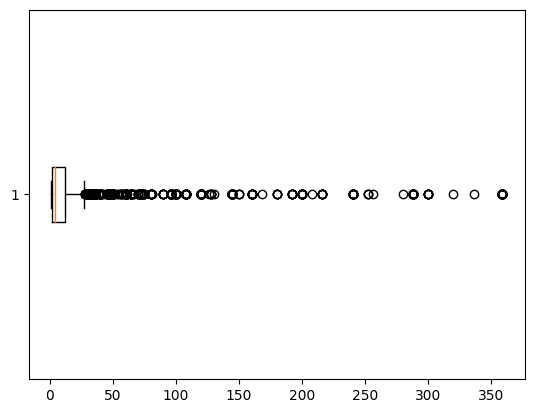

In [21]:
plt.boxplot(df['Quantity'],vert=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7995a9d4a320>,
 'caps': [<matplotlib.lines.Line2D at 0x7995a9d4a860>,
 'boxes': [<matplotlib.lines.Line2D at 0x7995a9d4a080>],
 'medians': [<matplotlib.lines.Line2D at 0x7995a9d4ada0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7995a9d4b040>],
 'means': []}

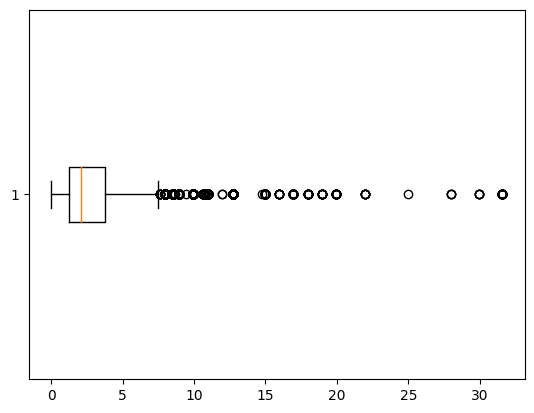

In [22]:
plt.boxplot(df['Price'],vert=0)

**Feature Engineering**

> A new feature called revenue is used here

In [23]:
df["Revenue"] = df["Quantity"] * df["Price"]

In [24]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [25]:
print("Max date :",df["InvoiceDate"].max())
print("Min date :",df["InvoiceDate"].min())

Max date : 2009-12-16 12:29:00
Min date : 2009-12-01 07:45:00


In [26]:
import datetime as dt

In [27]:
Latest_Date = dt.datetime(2011,12,10)

#RFM Featuring

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09.
Latest_Date = dt.datetime(2011,12,10)

#Creating RFM features with subset of customerID
RFM = df.groupby('Customer ID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days,
                                                 'Invoice': lambda x: x.nunique(),
                                                 "Revenue": lambda x: x.sum()})

RFM['InvoiceDate'] = RFM['InvoiceDate'].astype(int)

#Renaming column names to Recency, Frequency and Monetary
RFM.rename(columns={'InvoiceDate': 'Recency',
                         'Invoice': 'Frequency',
                         'Revenue': 'Monetary'}, inplace=True)

In [28]:
RFM.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,725,3,90.00
12358.0,731,1,1429.83
12359.0,734,1,723.91
12362.0,738,1,31.56
12417.0,729,2,317.60


**Introducing a new feature called Interpurchase time**

**The Fourth varibale of RFM, InterPurchase Time, is a measure of average time gap between total shopping trips by a customer. The Interpurchase Time is calcluted as fallows :**

> T = L/(F-1) = (Tn - T1)/(F-1)

* T --> Interpurchase Time
* L --> Shopping Cycle
* F --> Frequency
* T1 --> First purchase
* Tn --> Last purchase


Note: We consider only those customers who made purchase more than once.

In [29]:
RFM = RFM[(RFM["Frequency"]>1)]

In [30]:
RFM.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,725,3,90.00
12417.0,729,2,317.60
12471.0,725,4,2466.29
12600.0,726,2,433.89
12682.0,731,2,934.20


In [31]:
shopping_cycle = df.groupby('Customer ID').agg({'InvoiceDate': lambda x: ((x.max() - x.min()).days)})

In [32]:
RFM['Shopping_Cycle'] = shopping_cycle

In [33]:
RFM

,Recency,Frequency,Monetary,Shopping_Cycle
Customer ID,,,,
12346.0,725,3,90.00,0
12417.0,729,2,317.60,4
12471.0,725,4,2466.29,7
12600.0,726,2,433.89,6
12682.0,731,2,934.20,7
...,...,...,...,...
18065.0,730,2,306.90,0
18077.0,726,2,376.10,5
18087.0,725,4,989.74,13


In [34]:
RFM["Interpurchase_Time"] = RFM["Shopping_Cycle"] // RFM["Frequency"]

RFMT = RFM[["Recency","Frequency","Monetary","Interpurchase_Time"]]


In [35]:
RFMT.head()

,Recency,Frequency,Monetary,Interpurchase_Time
Customer ID,,,,
12346.0,725,3,90.00,0
12417.0,729,2,317.60,2
12471.0,725,4,2466.29,1
12600.0,726,2,433.89,3
12682.0,731,2,934.20,3


**Modelling with KMeans**

In [36]:
from yellowbrick.cluster import KElbowVisualizer
import warnings
from numpy import math

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

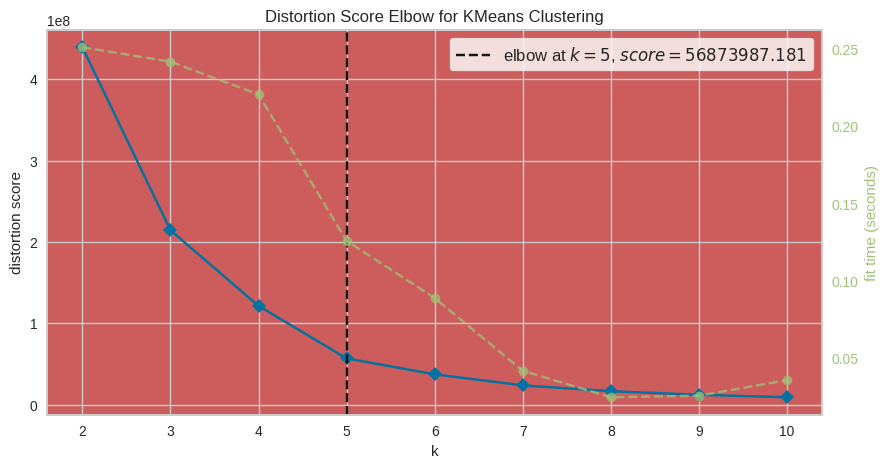

Therefore K = 4


In [37]:
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_facecolor("#cd5c5c")
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(RFMT)
Elbow_M.show()
print("Therefore K = 4")

In [38]:
kmeans = KMeans(n_clusters = 4, max_iter = 50)
kmeans.fit(RFMT)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

In [39]:
RFMT["Clusters"]=kmeans.labels_
RFMT.head()

,Recency,Frequency,Monetary,Interpurchase_Time,Clusters
Customer ID,,,,,
12346.0,725,3,90.00,0,0
12417.0,729,2,317.60,2,0
12471.0,725,4,2466.29,1,0
12600.0,726,2,433.89,3,0
12682.0,731,2,934.20,3,0


import numpy as np
from google.colab import autoviz
df_3447870100410278182 = autoviz.get_df('df_3447870100410278182')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3447870100410278182, *['Recency'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7966413130978955060 = autoviz.get_df('df_7966413130978955060')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7966413130978955060, *['Frequency'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5312053272802708457 = autoviz.get_df('df_5312053272802708457')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5312053272802708457, *['Monetary'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2099903671092660739 = autoviz.get_df('df_2099903671092660739')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2099903671092660739, *['Recency'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3867567779137797757 = autoviz.get_df('df_3867567779137797757')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3867567779137797757, *['Frequency'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6018033084206546929 = autoviz.get_df('df_6018033084206546929')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6018033084206546929, *['Monetary'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6708985730608443003 = autoviz.get_df('df_6708985730608443003')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_6708985730608443003, *[[['Recency', 'Frequency'], ['Frequency', 'Monetary']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_2592481649904182877 = autoviz.get_df('df_2592481649904182877')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2592481649904182877, *['Interpurchase_Time', 'Recency', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_8808433115635057721 = autoviz.get_df('df_8808433115635057721')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8808433115635057721, *['Interpurchase_Time', 'Frequency', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_7326052147603619648 = autoviz.get_df('df_7326052147603619648')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7326052147603619648, *['Interpurchase_Time', 'Monetary', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6244187564483649100 = autoviz.get_df('df_6244187564483649100')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6244187564483649100, *['Interpurchase_Time', 'count()', None], **{})
chart

**Model Evaluation**

In [40]:
# how well the clusters are?:
#centriods

kmeans.cluster_centers_

array([[7.27777778e+02, 2.44444444e+00, 8.50590657e+02, 2.22222222e+00],
       [7.26071429e+02, 5.35714286e+00, 4.99821321e+03, 2.07142857e+00],
       [7.24000000e+02, 7.00000000e+00, 2.72587000e+04, 2.00000000e+00],
       [7.23000000e+02, 9.00000000e+00, 1.54397600e+04, 1.00000000e+00]])

In [41]:
one = RFMT[RFMT["Clusters"]==0]
two = RFMT[RFMT["Clusters"]==1]
three = RFMT[RFMT["Clusters"]==2]
four = RFMT[RFMT["Clusters"]==3]

<function matplotlib.pyplot.show(close=None, block=None)>

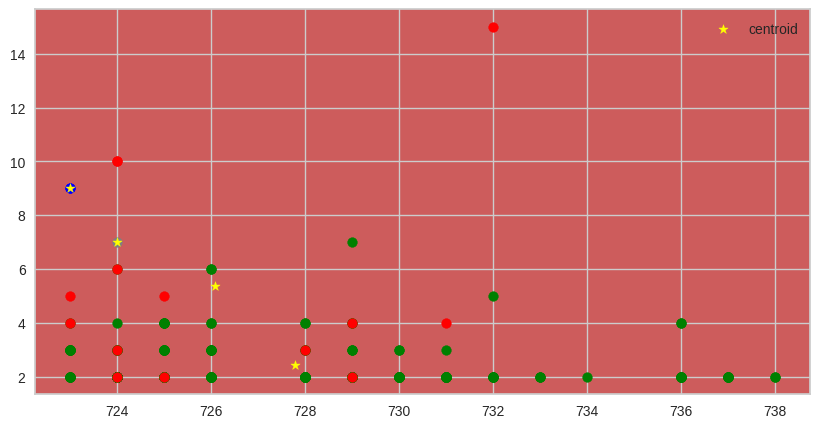

In [42]:
#Checking the quality of clustering in the data set
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_facecolor("#cd5c5c")
plt.scatter(one["Recency"],one["Frequency"],color='green')
plt.scatter(two["Recency"],two["Frequency"],color='red')
plt.scatter(three["Recency"],three["Frequency"],color='grey')
plt.scatter(four["Recency"],four["Frequency"],color='blue')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="yellow",marker="*",label="centroid")
plt.legend()
plt.show

**Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. Score closer to 1, higher the cluster distinguished.**

In [43]:
from sklearn.metrics import silhouette_score
print("Silhouette score :",silhouette_score(RFMT, kmeans.labels_, metric='euclidean'))

Silhouette score : 0.79232400974003
